# House Prices - Advanced Regression Techniques



In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We have choosen House_Price_Prediction dataset on Kaggle. Here, That dataset name is df. read the csv file into the data variable

In [127]:
df=pd.read_csv(r"C:\Users\nomra\Downloads\house-prices-advanced-regression-techniques\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [128]:
df=df.drop(['Id','MSZoning','Alley','Street','PoolQC','LandContour','Utilities','LotConfig','LandSlope','LotShape','ScreenPorch','PoolArea','MasVnrType','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond',
            'FireplaceQu','GarageFinish','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageQual','GarageCond','PavedDrive'],axis=1)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,272,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0,0,953,...,0,0,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,85.0,13175,6,6,1978,1988,790,163,589,...,0,0,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,66.0,9042,7,9,1941,2006,275,0,877,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,68.0,9717,5,6,1950,1996,49,1029,0,...,112,0,NaN,NaN,0,4,2010,WD,Normal,142125


In [129]:
df.isnull().any()

MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
Fence             True
MiscFeature       True
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
dtype: bool

In [130]:
df.LotFrontage= df.LotFrontage.fillna(df.LotFrontage.median())
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,272,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0,0,953,...,0,0,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,85.0,13175,6,6,1978,1988,790,163,589,...,0,0,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,66.0,9042,7,9,1941,2006,275,0,877,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,68.0,9717,5,6,1950,1996,49,1029,0,...,112,0,NaN,NaN,0,4,2010,WD,Normal,142125


In [143]:
df['Fence'].fillna(df['Fence'].mode()[0], inplace=True)
df['Fence']

0       MnPrv
1       MnPrv
2       MnPrv
3       MnPrv
4       MnPrv
        ...  
1455    MnPrv
1456    MnPrv
1457    GdPrv
1458    MnPrv
1459    MnPrv
Name: Fence, Length: 1460, dtype: object

In [145]:
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)
df['SaleType']

0       WD
1       WD
2       WD
3       WD
4       WD
        ..
1455    WD
1456    WD
1457    WD
1458    WD
1459    WD
Name: SaleType, Length: 1460, dtype: object

In [146]:
df['SaleCondition'].fillna(df['SaleCondition'].mode()[0], inplace=True)
df['SaleCondition']

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1460, dtype: object

In [147]:
df['MiscFeature'].fillna(df['MiscFeature'].mode()[0], inplace=True)
df['MiscFeature']

0       Shed
1       Shed
2       Shed
3       Shed
4       Shed
        ... 
1455    Shed
1456    Shed
1457    Shed
1458    Shed
1459    Shed
Name: MiscFeature, Length: 1460, dtype: object

In [148]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,2,2008,WD,Normal,208500,30.0,8321.969697,91.923882,10,1656.166667
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,5,2007,WD,Normal,181500,10.0,9481.481481,97.979590,6,1656.166667
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,9,2008,WD,Normal,223500,30.0,11086.956522,106.066017,6,1656.166667
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,2,2006,WD,Abnorml,140000,35.0,9393.442623,97.724101,5,1656.166667
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,12,2008,WD,Normal,250000,30.0,14092.235294,119.415242,5,1656.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0,0,953,...,8,2007,WD,Normal,175000,30.0,7791.333333,88.977525,10,1656.166667
1456,20,85.0,13175,6,6,1978,1988,790,163,589,...,2,2010,WD,Normal,210000,10.0,13021.802326,114.782403,4,1656.166667
1457,70,66.0,9042,7,9,1941,2006,275,0,877,...,5,2010,WD,Normal,266500,35.0,8907.044776,95.089432,7,1656.166667
1458,20,68.0,9717,5,6,1950,1996,49,1029,0,...,4,2010,WD,Normal,142125,10.0,9576.173913,98.574845,6,1656.166667


we use mean & replace to avoid unnecessary values.

At the next step we create new features using original data information.

In [149]:
for ind,row in df.iterrows():
     df.loc[ind,'Avg_MSSubClass_age']=row['MSSubClass'] /2
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,2,2008,WD,Normal,208500,30.0,8321.969697,91.923882,10,1656.166667
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,5,2007,WD,Normal,181500,10.0,9481.481481,97.979590,6,1656.166667
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,9,2008,WD,Normal,223500,30.0,11086.956522,106.066017,6,1656.166667
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,2,2006,WD,Abnorml,140000,35.0,9393.442623,97.724101,5,1656.166667
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,12,2008,WD,Normal,250000,30.0,14092.235294,119.415242,5,1656.166667


In [150]:
for ind,row in df.iterrows():
     df.loc[ind,'LotBackage']=row['LotFrontage']/(row['LotFrontage']+1)*row['LotArea']
df.head()        

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,2,2008,WD,Normal,208500,30.0,8321.969697,91.923882,10,1656.166667
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,5,2007,WD,Normal,181500,10.0,9481.481481,97.979590,6,1656.166667
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,9,2008,WD,Normal,223500,30.0,11086.956522,106.066017,6,1656.166667
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,2,2006,WD,Abnorml,140000,35.0,9393.442623,97.724101,5,1656.166667
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,12,2008,WD,Normal,250000,30.0,14092.235294,119.415242,5,1656.166667


In [151]:
df['sqrt_LotArea']=df['LotArea'].apply(np.sqrt)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,2,2008,WD,Normal,208500,30.0,8321.969697,91.923882,10,1656.166667
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,5,2007,WD,Normal,181500,10.0,9481.481481,97.979590,6,1656.166667
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,9,2008,WD,Normal,223500,30.0,11086.956522,106.066017,6,1656.166667
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,2,2006,WD,Abnorml,140000,35.0,9393.442623,97.724101,5,1656.166667
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,12,2008,WD,Normal,250000,30.0,14092.235294,119.415242,5,1656.166667


In [152]:
df['price_dependency'] =df.LotFrontage.apply(lambda x: df.MoSold[x])
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,2,2008,WD,Normal,208500,30.0,8321.969697,91.923882,10,1656.166667
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,5,2007,WD,Normal,181500,10.0,9481.481481,97.979590,6,1656.166667
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,9,2008,WD,Normal,223500,30.0,11086.956522,106.066017,6,1656.166667
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,2,2006,WD,Abnorml,140000,35.0,9393.442623,97.724101,5,1656.166667
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,12,2008,WD,Normal,250000,30.0,14092.235294,119.415242,5,1656.166667


In [153]:
df['parkinglot']=row['LotArea']/row['MoSold']
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,2,2008,WD,Normal,208500,30.0,8321.969697,91.923882,10,1656.166667
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,5,2007,WD,Normal,181500,10.0,9481.481481,97.979590,6,1656.166667
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,9,2008,WD,Normal,223500,30.0,11086.956522,106.066017,6,1656.166667
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,2,2006,WD,Abnorml,140000,35.0,9393.442623,97.724101,5,1656.166667
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,12,2008,WD,Normal,250000,30.0,14092.235294,119.415242,5,1656.166667


Next we use label Encoder to transform the string values into integer.

In [154]:
inputs=df.drop(['SalePrice'],axis=1)
target=df.SalePrice

In [156]:
from sklearn.preprocessing import LabelEncoder
le_Fence = LabelEncoder()
le_SaleType= LabelEncoder()
le_SaleCondition = LabelEncoder()
le_MiscFeature = LabelEncoder()

  


In [159]:
df['Fence_n'] = le_Fence.fit_transform(df['Fence'])
df['SaleType_n'] = le_SaleType.fit_transform(df['SaleType'])
df['SaleCondition_n'] = le_SaleCondition.fit_transform(df['SaleCondition'])
df['MiscFeature_n'] = le_MiscFeature.fit_transform(df['MiscFeature'])


In [161]:
df=df.drop(df[['Fence','SaleType','SaleCondition','MiscFeature']],axis=1)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot,Fence_n,SaleType_n,SaleCondition_n,MiscFeature_n
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,208500,30.0,8321.969697,91.923882,10,1656.166667,2,8,4,2
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,181500,10.0,9481.481481,97.979590,6,1656.166667,2,8,4,2
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,223500,30.0,11086.956522,106.066017,6,1656.166667,2,8,4,2
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,140000,35.0,9393.442623,97.724101,5,1656.166667,2,8,0,2
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,250000,30.0,14092.235294,119.415242,5,1656.166667,2,8,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0,0,953,...,175000,30.0,7791.333333,88.977525,10,1656.166667,2,8,4,2
1456,20,85.0,13175,6,6,1978,1988,790,163,589,...,210000,10.0,13021.802326,114.782403,4,1656.166667,2,8,4,2
1457,70,66.0,9042,7,9,1941,2006,275,0,877,...,266500,35.0,8907.044776,95.089432,7,1656.166667,0,8,4,2
1458,20,68.0,9717,5,6,1950,1996,49,1029,0,...,142125,10.0,9576.173913,98.574845,6,1656.166667,2,8,4,2


we use scaler function to scale the values to get better result.

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [163]:
scaler.fit(df.drop('SalePrice',axis=1))

StandardScaler()

In [164]:
scaled_features = scaler.transform(df.drop('SalePrice',axis=1))

In [165]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,YrSold,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot,Fence_n,SaleType_n,SaleCondition_n
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,0.138777,0.073375,-0.207373,-0.226859,1.458577,1.0,0.250362,0.313867,0.208502,0.039485
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,-0.614439,-0.872563,-0.089862,-0.016128,-0.110999,1.0,0.250362,0.313867,0.208502,0.039485
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,0.138777,0.073375,0.072846,0.265270,-0.110999,1.0,0.250362,0.313867,0.208502,0.039485
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,-1.367655,0.309859,-0.098784,-0.025019,-0.503393,1.0,0.250362,0.313867,-3.426284,0.039485
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,0.138777,0.073375,0.377418,0.729807,-0.503393,1.0,0.250362,0.313867,0.208502,0.039485


Using train_test_split model to train & predict values.

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat,df['SalePrice'],
                                                    test_size=0.20,random_state=1000)

In [167]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,YrSold,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot,Fence_n,SaleType_n,SaleCondition_n
931,-0.872563,0.006190,-0.141997,-0.795151,0.381743,-0.207594,-0.962566,-0.231696,2.601018,-1.010244,...,0.891994,-0.872563,-0.141513,-0.106106,-1.680576,1.0,-2.019998,0.313867,0.208502,0.039485
1436,-0.872563,-0.447940,-0.152020,-1.518467,0.381743,-0.008870,-0.671845,0.378031,-0.288653,-0.722728,...,-0.614439,-0.872563,-0.153610,-0.124396,-0.503393,1.0,-2.019998,0.313867,0.208502,0.039485
1214,0.664586,-0.039223,-0.031252,-0.795151,-0.517200,-0.306957,-1.107926,0.746499,-0.288653,-0.964966,...,-1.367655,0.664586,-0.031311,0.089668,0.281395,1.0,0.250362,0.313867,0.208502,0.039485
611,0.546344,-0.039223,-0.012210,-0.071836,0.381743,0.222975,-0.332670,0.353905,-0.288653,-0.317490,...,-0.614439,0.546344,-0.012330,0.122242,0.281395,1.0,0.250362,0.313867,0.208502,0.039485
1376,-0.636078,-0.811244,-0.423421,-0.071836,-0.517200,-1.366820,-1.689368,-0.130806,-0.288653,-0.414838,...,0.138777,-0.636078,-0.425133,-0.665385,-0.503393,1.0,0.250362,0.313867,0.208502,0.039485


In [168]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,YrSold,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot,Fence_n,SaleType_n,SaleCondition_n
107,-0.872563,-0.902070,-0.452686,-0.795151,-0.517200,-0.770647,-1.689368,-0.744919,0.759318,-0.116003,...,0.138777,-0.872563,-0.454618,-0.730196,0.281395,1.0,0.250362,0.313867,1.117199,0.039485
33,-0.872563,0.006190,0.003525,-0.795151,-0.517200,-0.406319,-1.253287,1.259723,-0.288653,-0.423894,...,1.645210,-0.872563,0.003569,0.148935,-1.680576,1.0,0.250362,0.313867,0.208502,0.039485
1197,0.428102,-0.220875,-0.167053,0.651479,0.381743,-1.830511,-1.689368,-0.973018,-0.288653,0.560903,...,-1.367655,0.428102,-0.167449,-0.152022,1.458577,1.0,0.250362,-1.619660,0.208502,0.039485
1042,1.492282,-1.628678,-0.514723,-0.071836,-0.517200,1.117235,0.975575,1.000918,-0.288653,-0.365032,...,0.891994,1.492282,-0.521009,-0.873023,0.673789,1.0,0.250362,0.313867,0.208502,0.039485
625,-0.872563,0.778211,-0.051798,-0.071836,0.381743,-0.306957,-1.107926,-0.973018,-0.288653,1.242337,...,1.645210,-0.872563,-0.048829,0.054180,-0.110999,1.0,0.250362,0.313867,0.208502,0.039485


In [169]:
y_train.head()

931     117500
1436    120500
1214    134500
611     148000
1376     91000
Name: SalePrice, dtype: int64

In [170]:
y_test.head()

107     115000
33      165500
1197    144000
1042    196000
625     160000
Name: SalePrice, dtype: int64

We chose Random Forest Classifier to select features.

In [171]:
from sklearn.ensemble import RandomForestRegressor

df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SalePrice,Avg_MSSubClass_age,LotBackage,sqrt_LotArea,price_dependency,parkinglot,Fence_n,SaleType_n,SaleCondition_n,MiscFeature_n
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,208500,30.0,8321.969697,91.923882,10,1656.166667,2,8,4,2
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,181500,10.0,9481.481481,97.979590,6,1656.166667,2,8,4,2
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,223500,30.0,11086.956522,106.066017,6,1656.166667,2,8,4,2
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,140000,35.0,9393.442623,97.724101,5,1656.166667,2,8,0,2
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,250000,30.0,14092.235294,119.415242,5,1656.166667,2,8,4,2


In [172]:
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X_train,y_train)


RandomForestRegressor(max_depth=10, random_state=1)

In [173]:
df.columns.values

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Avg_MSSubClass_age',
       'LotBackage', 'sqrt_LotArea', 'price_dependency', 'parkinglot',
       'Fence_n', 'SaleType_n', 'SaleCondition_n', 'MiscFeature_n'],
      dtype=object)

In [174]:
model.feature_importances_

array([1.80428112e-03, 6.43499803e-03, 7.79980025e-03, 5.47005589e-01,
       5.76692305e-03, 1.61571058e-02, 1.11229291e-02, 3.56259643e-02,
       7.37300895e-04, 8.32860005e-03, 4.10783699e-02, 3.59122866e-02,
       4.31854575e-02, 6.22009972e-05, 1.17332776e-01, 1.59432845e-03,
       8.67260297e-04, 2.03895543e-03, 1.37088213e-03, 1.96957676e-03,
       8.17911626e-04, 5.60912978e-03, 6.31413108e-03, 2.98010825e-02,
       2.83501442e-02, 5.27389102e-03, 6.41153119e-03, 8.57853666e-04,
       1.15819739e-04, 1.12683785e-04, 4.28906263e-03, 1.83569262e-03,
       1.31700301e-03, 8.03476933e-03, 6.85875450e-03, 3.93111062e-03,
       0.00000000e+00, 2.96244278e-04, 9.45312527e-04, 2.63228673e-03,
       0.00000000e+00])

In [175]:
dict(reversed(sorted(zip(model.feature_importances_, df.columns.values))))

{0.5470055885435966: 'OverallQual',
 0.11733277586737355: 'GrLivArea',
 0.04318545750985114: '2ndFlrSF',
 0.04107836993596469: 'TotalBsmtSF',
 0.03591228663539397: '1stFlrSF',
 0.03562596434209342: 'BsmtFinSF1',
 0.029801082504337793: 'GarageCars',
 0.028350144156536715: 'GarageArea',
 0.016157105786097366: 'YearBuilt',
 0.011122929133398738: 'YearRemodAdd',
 0.008328600046842357: 'BsmtUnfSF',
 0.008034769331924714: 'Avg_MSSubClass_age',
 0.007799800249765743: 'LotArea',
 0.006858754502283494: 'LotBackage',
 0.0064349980332474785: 'LotFrontage',
 0.006411531189751854: 'OpenPorchSF',
 0.006314131075161262: 'Fireplaces',
 0.005766923049977231: 'OverallCond',
 0.005609129782113746: 'TotRmsAbvGrd',
 0.005273891018598781: 'WoodDeckSF',
 0.0042890626295573045: 'MoSold',
 0.003931110618110801: 'sqrt_LotArea',
 0.002632286730010871: 'SaleType_n',
 0.002038955433800225: 'FullBath',
 0.001969576759120914: 'BedroomAbvGr',
 0.0018356926157736004: 'YrSold',
 0.0018042811154274153: 'MSSubClass',
 0.

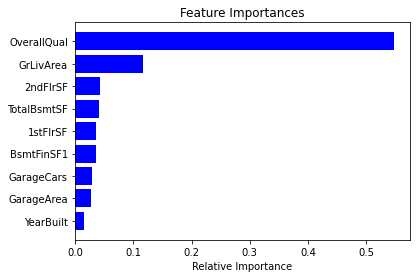

In [176]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [177]:
X=df[['OverallQual', 'GrLivArea','2ndFlrSF', 'TotalBsmtSF','1stFlrSF','sqrt_LotArea','Avg_MSSubClass_age','LotBackage','price_dependency','parkinglot']]
y=df['SalePrice']
print(X)
print(y)

      OverallQual  GrLivArea  2ndFlrSF  TotalBsmtSF  1stFlrSF  sqrt_LotArea  \
0               7       1710       854          856       856     91.923882   
1               6       1262         0         1262      1262     97.979590   
2               7       1786       866          920       920    106.066017   
3               7       1717       756          756       961     97.724101   
4               8       2198      1053         1145      1145    119.415242   
...           ...        ...       ...          ...       ...           ...   
1455            6       1647       694          953       953     88.977525   
1456            6       2073         0         1542      2073    114.782403   
1457            7       2340      1152         1152      1188     95.089432   
1458            5       1078         0         1078      1078     98.574845   
1459            5       1256         0         1256      1256     99.684502   

      Avg_MSSubClass_age    LotBackage  price_depen

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1000)

In [202]:
X_train.head()

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,1stFlrSF,sqrt_LotArea,Avg_MSSubClass_age,LotBackage,price_dependency,parkinglot
931,5,925,0,925,925,95.393920,10.0,8971.830986,2,1656.166667
1436,4,864,0,864,864,94.868330,10.0,8852.459016,5,1656.166667
1214,5,999,0,925,999,101.019800,42.5,10059.214286,7,1656.166667
611,6,1032,0,1032,1032,101.955873,40.0,10246.500000,7,1656.166667
1376,6,790,0,768,790,79.322128,15.0,6173.283019,5,1656.166667


In [203]:
X_test.head()

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,1stFlrSF,sqrt_LotArea,Avg_MSSubClass_age,LotBackage,price_dependency,parkinglot
107,5,789,0,789,789,77.459667,10.0,5882.352941,7,1656.166667
33,5,1700,0,1398,1700,102.722928,10.0,10403.380282,2,1656.166667
1197,7,1690,875,815,815,94.074439,37.5,8715.909091,10,1656.166667
1042,6,1306,0,1306,1306,73.355300,60.0,5227.257143,8,1656.166667
625,6,1116,0,1116,1116,100.000000,10.0,9886.363636,6,1656.166667


In [204]:
y_train.head()

931     117500
1436    120500
1214    134500
611     148000
1376     91000
Name: SalePrice, dtype: int64

In [205]:
y_test.head()

107     115000
33      165500
1197    144000
1042    196000
625     160000
Name: SalePrice, dtype: int64

We select to run our datasets on 3 models.

Logistic Regression 

In [206]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\nomra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [207]:
predictions = logmodel.predict(X_test)
predictions

array([110000, 180000, 135000, 145000, 140000, 145000, 290000, 110000,
       145000, 140000, 110000, 185000, 190000, 140000, 185000, 140000,
       143000, 140000, 155000, 110000, 110000, 239000, 130000, 135000,
       140000, 200000, 180000, 180000, 155000, 145000, 143000, 155000,
       155000, 185000, 145000, 140000, 110000, 180000, 145000, 130000,
       110000, 145000, 155000, 235000, 145000, 110000, 135000, 200000,
       143000, 140000, 140000, 200000, 140000, 130000, 130000, 110000,
       110000, 110000, 140000, 169000, 140000, 180000, 130000, 110000,
       180000, 180000, 135000, 145000, 140000, 185000, 145000, 160000,
       145000, 239000, 143000, 130000, 143000, 180000, 155000, 155000,
       135000, 143000, 180000, 143000, 145000, 145000, 130000, 180000,
       140000, 200000, 315000, 135000, 135000, 143000, 135000, 140000,
       180000, 143000, 200000, 180000, 140000, 110000, 130000, 140000,
       130000, 180000, 135000, 239000, 143000, 180000, 140000, 140000,
      

In [208]:
logmodel.score(X_test,y_test)

0.00684931506849315

KNN 

In [209]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [210]:
y_pred = knn.predict(X_test)
y_pred

array([120500, 174000, 200500, 180000, 137500, 203000, 340000,  73000,
       157000, 139000, 103000, 168000, 171000, 109500, 223500, 145000,
       152000, 120000, 141500, 117000, 110000, 275500,  80000, 158000,
       137000, 337000, 377426, 142000, 200100, 174900, 156000, 183500,
       107400, 137000, 179600, 149900, 120500, 324000, 202500, 134000,
       119500, 109000, 131000, 200500, 154000, 132000, 269790, 272000,
       111250, 110000, 109900, 325000, 126000, 130000, 112000, 144000,
       144000, 133000, 112000, 122500,  95000, 176432, 209500, 109500,
       227000, 167000, 140000, 204900, 144000, 143000, 153500, 200624,
       131000, 403000, 175000, 286000, 165000, 214000, 149000, 183000,
       154900, 145000, 290000, 152000, 132000, 174000, 196000, 175000,
       149700, 214000, 316600, 167900, 173500, 180500, 178000, 109900,
       268000, 264132, 256000, 320000, 123000, 136500, 155000, 184100,
       177500, 224900, 133000, 412500, 141000, 185000, 139400,  93500,
      

In [211]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       39300       0.00      0.00      0.00         1
       52500       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         0
       73000       0.00      0.00      0.00         0
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79000       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         1
       79900       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         0
       81000       0.00      0.00      0.00         2
       82500       0.00      0.00      0.00         1
       83500       0.00      0.00      0.00         0
       84500       0.00      0.00      0.00         1
       85000       0.00      0.00      0.00         1
       86000       0.00    

C:\Users\nomra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nomra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:

accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

C:\Users\nomra\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\nomra\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\nomra\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\nomra\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\nomra\anaconda3\lib\site-packag

C:\Users\nomra\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\nomra\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\nomra\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\nomra\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Text(0, 0.5, 'Accuracy Rate')

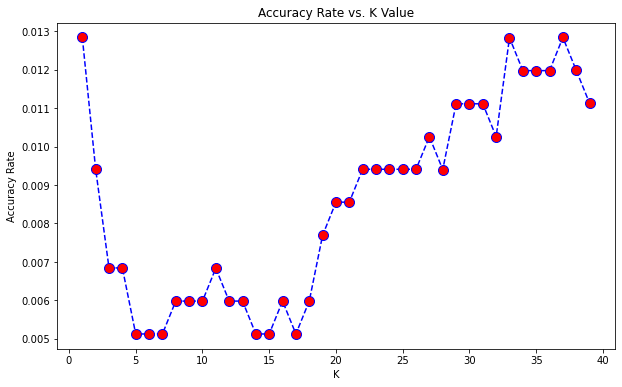

In [214]:

plt.figure(figsize=(10,6))  
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [215]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=1


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

       39300       0.00      0.00      0.00         1
       52500       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         0
       73000       0.00      0.00      0.00         0
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79000       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         1
       79900       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         0
       81000       0.00      0.00      0.00         2
       82500       0.00      0.00      0.00         1
       83500       0.00      0.00      0.00         0
  

C:\Users\nomra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nomra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:

knn = KNeighborsClassifier(n_neighbors=39)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('WITH K=39')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=39


[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

       37900       0.00      0.00      0.00         0
       39300       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         0
       52000       0.00      0.00      0.00         0
       52500       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       76500       0.00      0.00      0.00         0
       79000       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         1
       79900       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         0
       81000       0.00      0.00      0.00         2
 

C:\Users\nomra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nomra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [229]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [230]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [231]:
model.score(X_test,y_test)

0.0136986301369863

In [232]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier

In [235]:
export_graphviz(model, "model.tree", feature_names=X.columns)
print(open("model.tree").read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



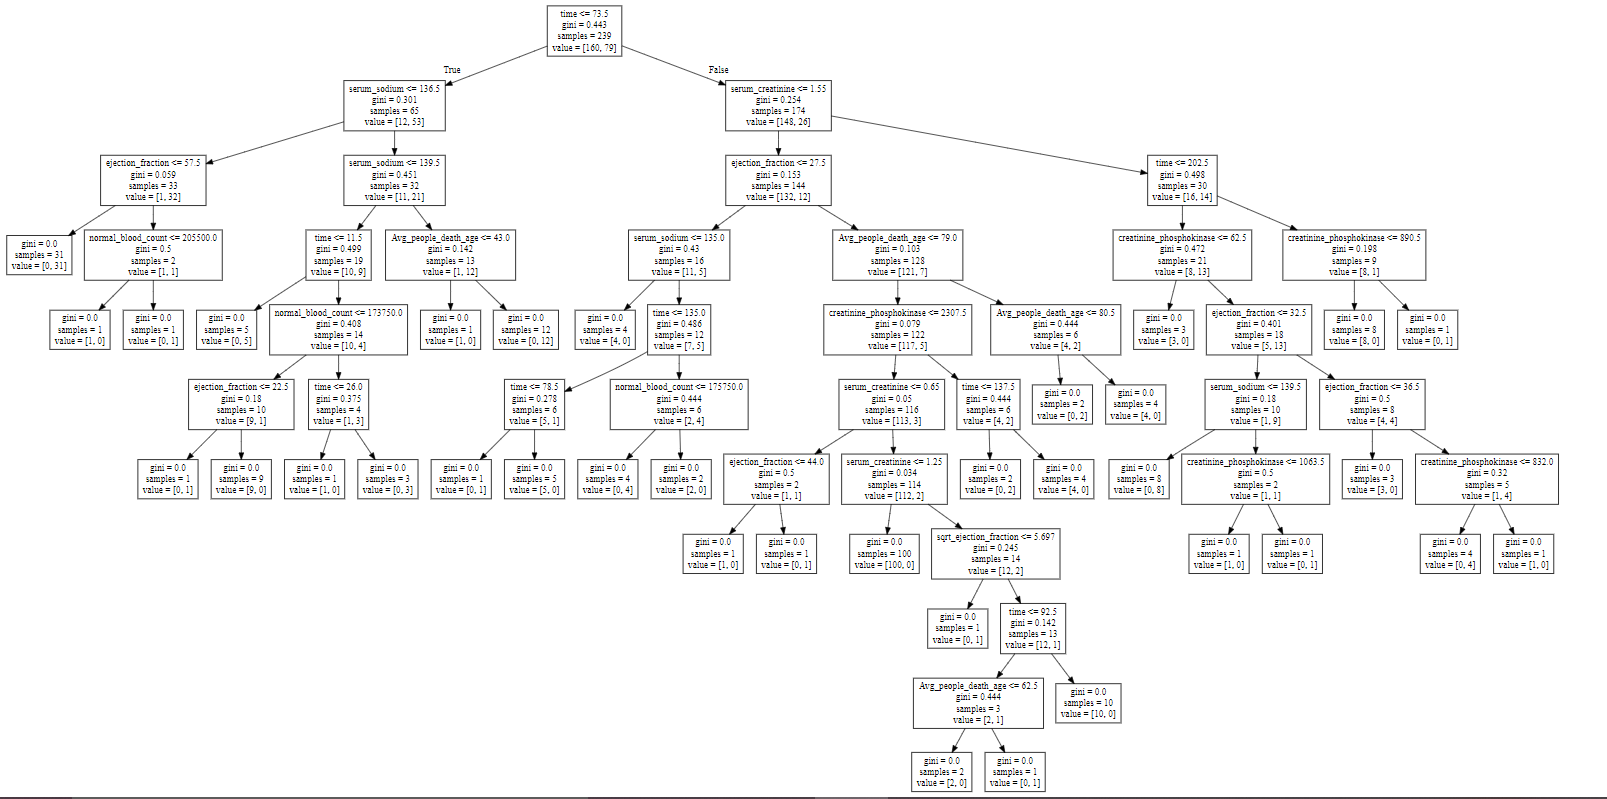

In [56]:
from IPython.display import Image
Image(r"C:\Users\nomra\Desktop\project.PNG")
